In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import Transactions
import matplotlib.pyplot as plt
from Budget import Budget
from Budgets import Budgets

In [15]:
all_trxs = Transactions.Transactions.from_csv('2018-01-14_All_Transactions.csv')

In [16]:
b = Budget(-15, ['Hair (Andrew)', 'Hair'], name='Haircuts')

In [46]:
print(b)

Haircuts                  | $-15   | ['Hair (Andrew)', 'Hair']


In [17]:
bs = Budgets()
bs.add_budget(Budget(-15, ['Hair (Andrew)', 'Hair'], name='Haircuts'))
bs.add_budget(Budget(-500, ['Vancouver 2017', 'Beach 2017'], name='Vacations'))
bs.add_budget(Budget(-130, ['Electricity']))

In [12]:
some_trxs = bs.get_transactions_in_budgets(all_trxs)
print(some_trxs)

5: 2018-01-08 00:00:00 | -16.0 | Great Clips | Hair (Andrew)
23: 2018-01-02 00:00:00 | -176.94 | Hertz | Vancouver 2017
28: 2018-01-02 00:00:00 | -20.96 | WestJet | Vancouver 2017
56: 2017-12-24 00:00:00 | -99.0 | Sedc | Electricity
80: 2017-12-17 00:00:00 | -16.0 | Great Clips | Hair (Andrew)
93: 2017-12-12 00:00:00 | -163.3 | Bliss | Hair
164: 2017-11-24 00:00:00 | -94.0 | Sedc | Electricity
178: 2017-11-21 00:00:00 | -16.0 | Great Clips | Hair
204: 2017-11-10 00:00:00 | -29.92 | Akahana Asian Bistro | Vancouver 2017
227: 2017-11-04 00:00:00 | -13.34 | Panera Bread | Beach 2017
268: 2017-10-24 00:00:00 | -115.0 | Sedc | Electricity
284: 2017-10-16 00:00:00 | -16.0 | Great Clips | Hair (Andrew)
328: 2017-10-03 00:00:00 | -344.49 | Hertz | Vancouver 2017
334: 2017-10-01 00:00:00 | 201.32 | Vrbo | Vancouver 2017
336: 2017-09-30 00:00:00 | -54.67 | Shell | Vancouver 2017
337: 2017-09-30 00:00:00 | -31.2 | Wolfgang Puck B | Vancouver 2017
338: 2017-09-30 00:00:00 | -1.51 | Tim Horton's | 

In [13]:
some_not_trxs = bs.get_transactions_not_in_budgets(all_trxs)
print(some_not_trxs)

0: 2018-01-02 00:00:00 | 0.0 | Lyft | Trips Home
1: 2018-01-02 00:00:00 | -9.59 | Hudson St | Trips Home
2: 2018-01-10 00:00:00 | -120.0 | Check 128 | Check
3: 2018-01-09 00:00:00 | -453.98 | International Male | Clothing
4: 2018-01-09 00:00:00 | -83.36 | Harris Teeter | Groceries
6: 2018-01-07 00:00:00 | -20.62 | Target | Groceries
7: 2018-01-07 00:00:00 | 2803.86 | Received | Credit Card Payment
8: 2018-01-07 00:00:00 | -60.0 | Inner Peaks | Sports
9: 2018-01-06 00:00:00 | -131.56 | Target | Groceries
10: 2018-01-06 00:00:00 | -227.24 | Lowe's | Home Improvement
11: 2018-01-06 00:00:00 | -7.85 | Starbucks | Coffee Shops
12: 2018-01-05 00:00:00 | -2.34 | Market@Work | Food at Work
13: 2018-01-05 00:00:00 | 3300.0 | Transfer from Checking | Transfer
14: 2018-01-05 00:00:00 | -3300.0 | Transfer to Regular Savings | Transfer
15: 2018-01-05 00:00:00 | 1670.34 | Siemens Energy Edi | Income
16: 2018-01-05 00:00:00 | 1805.52 | Siemens Energy Edi | Income
17: 2018-01-04 00:00:00 | -2.24 | Mar

In [18]:
bs.display()

Haircuts                  | $-15   | ['Hair (Andrew)', 'Hair']
Vacations                 | $-500  | ['Vancouver 2017', 'Beach 2017']
Electricity               | $-130  | ['Electricity']


In [22]:
bs.plot(all_trxs, moving_average=[6, 12])

In [8]:
bs.plot(all_trxs, moving_average=[12], saveloc='./test/', prefix=True)

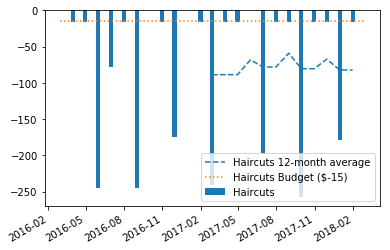

In [20]:
fig, ax = b.plot_budget(all_trxs, moving_average=[12])
plt.legend()
plt.show()


In [23]:
fig, ax = b.plot_budget(all_trxs, moving_average=[12], savefig='test')
# plt.legend()
# plt.show()


In [ ]:
ax.legend

In [6]:
trxs = b.tabulate_transactions(all_trxs)
# g = trxs.df.loc[:, 'Amount'].itertuples()
amounts = trxs.df.loc[:, 'Amount']
indices = trxs.df.index
print(indices)
for amount in amounts:
    index = next(indices)
    print(index, amount)

# x = next(g)

# print(x[2])
# print(list(trxs.df.itertuples()))

RangeIndex(start=0, stop=23, step=1)


TypeError: 'RangeIndex' object is not an iterator

In [7]:
list(g.iteritems())

NameError: name 'g' is not defined

In [16]:
",".join(['1', '2'])

'1,2'

In [4]:
sum_monthly = all_trxs.slice_by_category(['Hair (Andrew)']).by_month()
avg_6month = all_trxs.slice_by_category(['Hair (Andrew)']).moving_average(n=6)


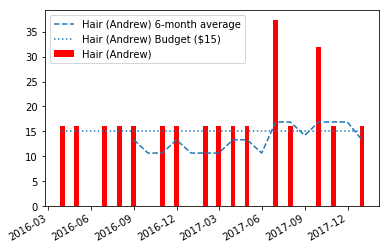

In [7]:
n=6
category='Hair (Andrew)'
budget=15
# fig, ax = plt.subplots()
# plt.plot(test.df['Date'].as_matrix(), -1*test.df['Amount'].as_matrix(), '.-')
# plt.show()
fig, ax = plt.subplots()
ax.bar(sum_monthly.df['Date'].as_matrix(), -1*sum_monthly.df['Amount'].as_matrix(), width=10, label=f'{category}', color='red')
# color = ax.plot(sum_monthly.df['Date'].as_matrix(), -1*sum_monthly.df['Amount'].as_matrix(), 'o', label=f'{category}')[0].get_color()
ax.plot(avg_6month.df['Date'].as_matrix(), -1*avg_6month.df['Amount'].as_matrix(), color=color, label=f'{category} {n}-month average', ls='--')
ax.plot([sum_monthly.df['Date'].as_matrix().min(), sum_monthly.df['Date'].as_matrix().max()], [budget, budget], color=color, ls=':', label=f'{category} Budget (${budget})')
# ax.xaxis_date()
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right')
plt.legend()
plt.show()

In [20]:
# fig, ax = plt.subplots()
test.df.plot(x='Date', y='Amount', kind='bar')
test2.df.plot(x='Date', y='Amount', kind='line')

# print([test.df.Date.min(), test.df.Date.max()])
# ax.plot([test.df.Date.min(), test.df.Date.max()], [-15, -15], '-o')
plt.show()

NameError: name 'test' is not defined

In [30]:
import pandas as pd
import datetime
ds = pd.Series()

In [24]:
ds.test =5


In [25]:
ds.

Series([], dtype: float64)

In [31]:
amounts = [10, -5, 20]
dates = [datetime.datetime(2016, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2018, 1, 1)]


In [32]:
ds = pd.Series(data=amounts, index=dates)

In [33]:
ds

2016-01-01    10
2017-01-01    -5
2018-01-01    20
dtype: int64